## Generate dataset and perform training

In [2]:
# use this to generate the data for the project
! cd ..; python3 -m src.utils.clean

In [2]:
# package imports
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path

In [4]:
# load the data
train_full = pd.read_json('../out/train.json', orient="split")
test_full = pd.read_json('../out/test.json', orient="split")

train_mini = pd.read_json('../out/train_mini.json', orient="split")
test_mini = pd.read_json('../out/test_mini.json', orient="split")

In [5]:
# global variables
dotenv_path = Path('../prod.env')
load_dotenv(dotenv_path=dotenv_path)
noQueries = 4
noCandids = 5

In [6]:
# custom imports - autoreload reloads your functions when you change them
%load_ext autoreload
%autoreload 2
from sampling import SAMPLING
from training import ZERO_SHOT_GENERATOR
from llms import PAYLOADS
from selection import SELECTOR

/Users/anon/Rutgers/AdvDBDS/sql_to_text/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
# zeroshot approach - llama model used
llzeroshot = ZERO_SHOT_GENERATOR(PAYLOADS.LLAMA_8B, train_mini)
llzeroshot.sample()

In [ ]:
# sampling approach - llama train samples
llsample = SAMPLING(PAYLOADS.LLAMA_8B, train_mini, noQueries)
llsample.generate_samples(test_mini)

In [ ]:
llsample.compare_responses(True)

In [ ]:
llselector = SELECTOR()
llselector.pool_responses(llzeroshot.responses, llsample.bq_model.responses, llsample.s_model.responses)
llselector.select_responses()
llselector.get_accuracy()

In [ ]:
# zeroshot approach - finetuned model used
ftzeroshot = ZERO_SHOT_GENERATOR(PAYLOADS.FINE_TUNE_8B, train_mini)
ftzeroshot.sample()

In [10]:
# sampling approach - finetuned train samples
ftsamplef = SAMPLING(PAYLOADS.FINE_TUNE_8B, train_mini, noQueries)
ftsamplef.generate_samples(test_mini)

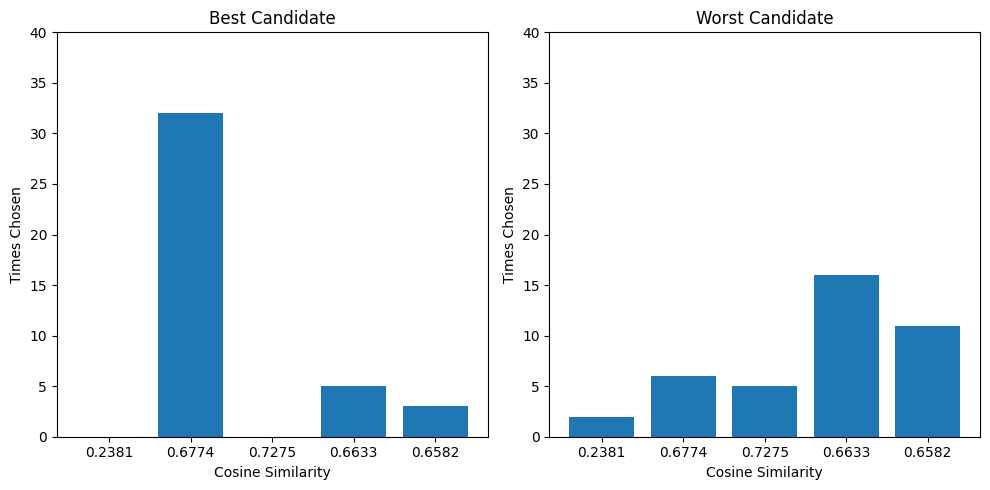

Best Choice: 2  How many users have accessed the website after 1st September 2014?





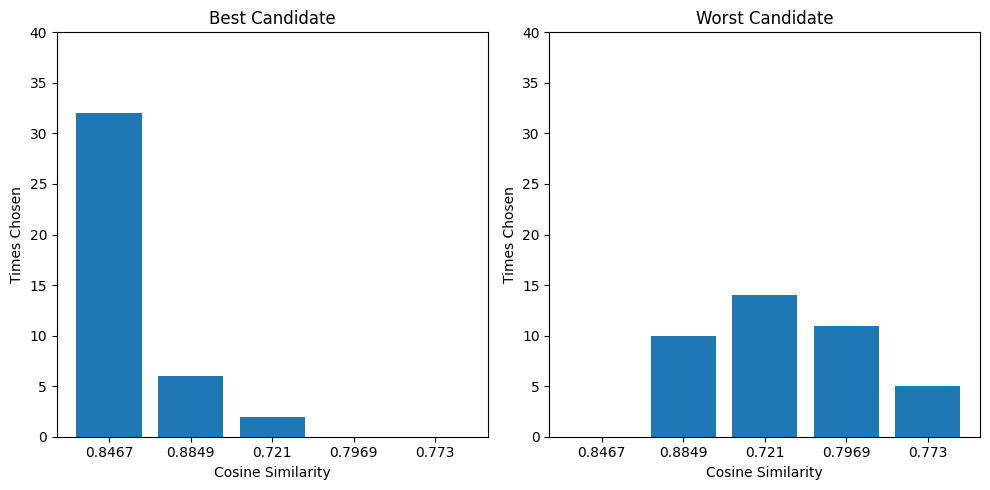

Best Choice: 1  List the names of all the unique singers who have songs with sales value greater than 300000.





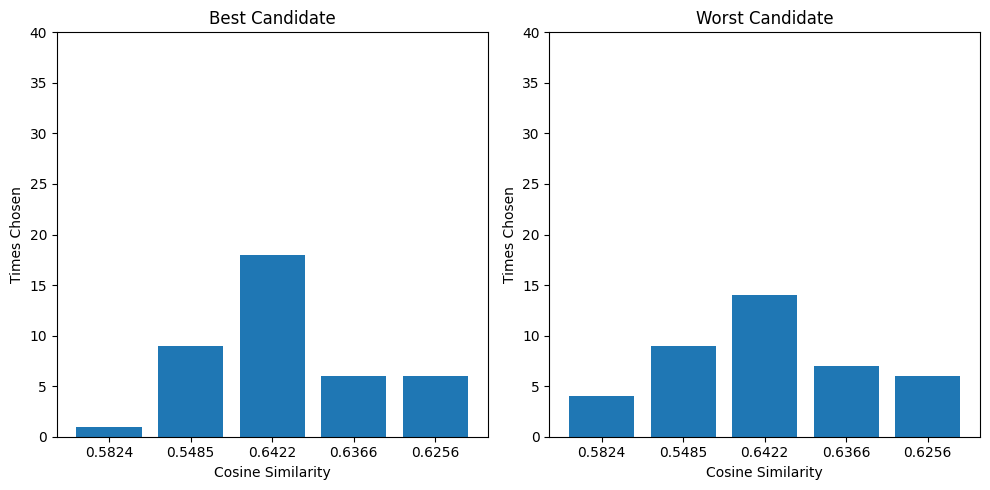

Best Choice: 3  List the distinct breed code and size code of dogs.





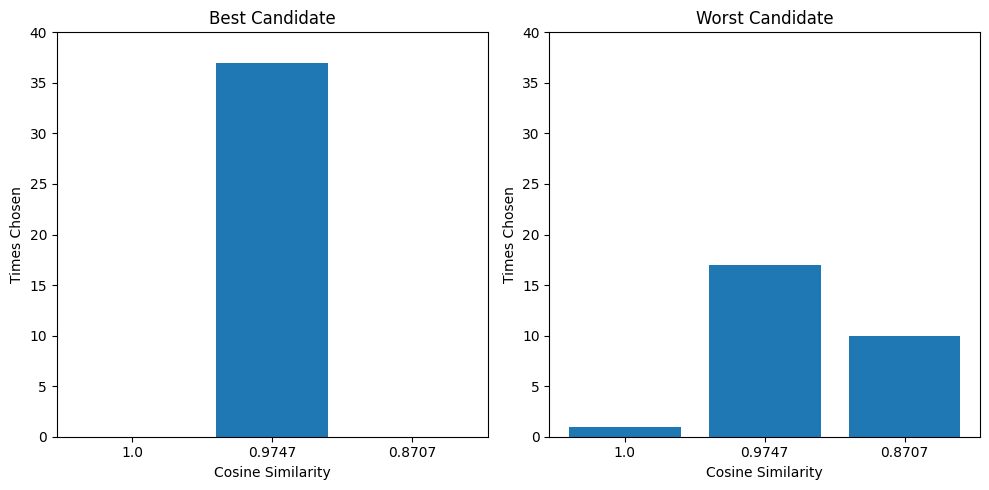

Best Choice: 5  How many superheroes are published by Dark Horse Comics?





In [12]:
ftsamplef.compare_responses(True)

In [ ]:
ftselector = SELECTOR()
ftselector.pool_responses(ftzeroshot.responses, ftsamplef.bq_model.responses, ftsamplef.s_model.responses)
ftselector.select_responses()
ftselector.get_accuracy()